In [46]:
import cv2
import matplotlib.pyplot as plt

from os import listdir, path, makedirs
from os.path import isfile, join

import shutil

from sklearn.metrics import accuracy_score

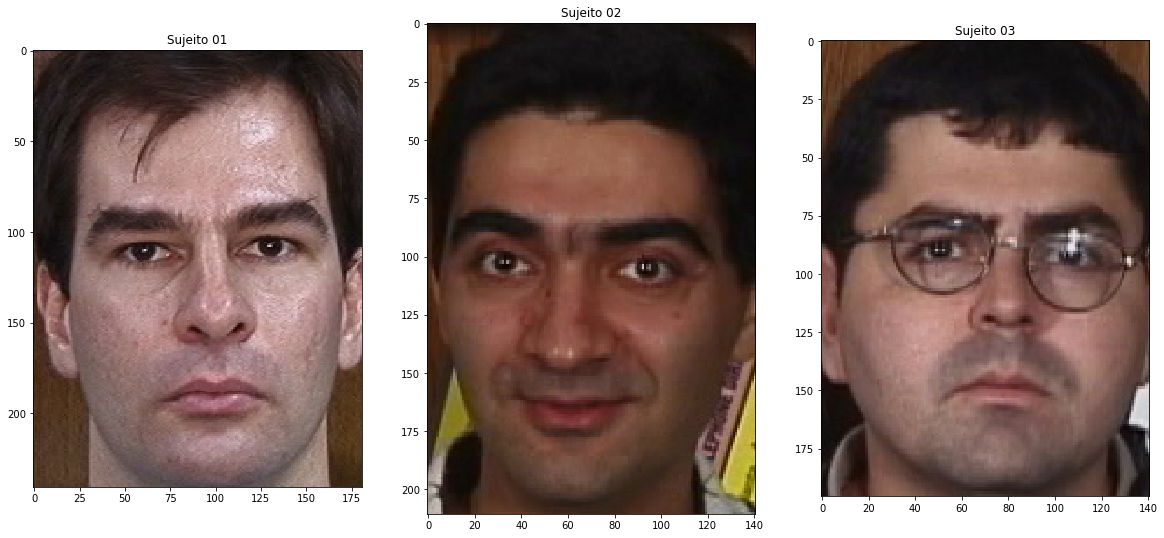

In [3]:
imagem_face_1 = cv2.imread("imagens/cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("imagens/cropped_faces/s02_01.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("imagens/cropped_faces/s03_01.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1)
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2)
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3)

plt.show()

In [4]:
imagem_face_1.shape

(241, 181, 3)

In [5]:
imagem_face_2.shape

(211, 141, 3)

In [6]:
imagem_face_3.shape

(196, 141, 3)

In [7]:
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [8]:
lista_arq_faces[0]

's23_06.jpg'

In [9]:
len(lista_arq_faces)

750

In [10]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [11]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [12]:
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [13]:
lista_faces_treino[0]

's23_06.jpg'

In [14]:
lista_faces_teste[0]

's23_12.jpg'

In [15]:
dados_treinamento, sujeitos = [], []

In [16]:
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [17]:
len(dados_treinamento)

500

In [18]:
len(sujeitos)

500

In [19]:
dados_teste, sujeitos_teste = [], [] 

In [20]:
for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [21]:
len(dados_teste)

250

In [22]:
len(sujeitos_teste)

250

Text(0.5, 1.0, '0')

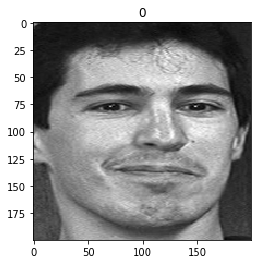

In [23]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

Text(0.5, 1.0, '23')

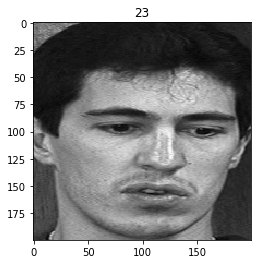

In [24]:
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeitos_teste[0])

In [25]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [26]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

In [27]:
modelo_eingenfaces.train(dados_treinamento, sujeitos)

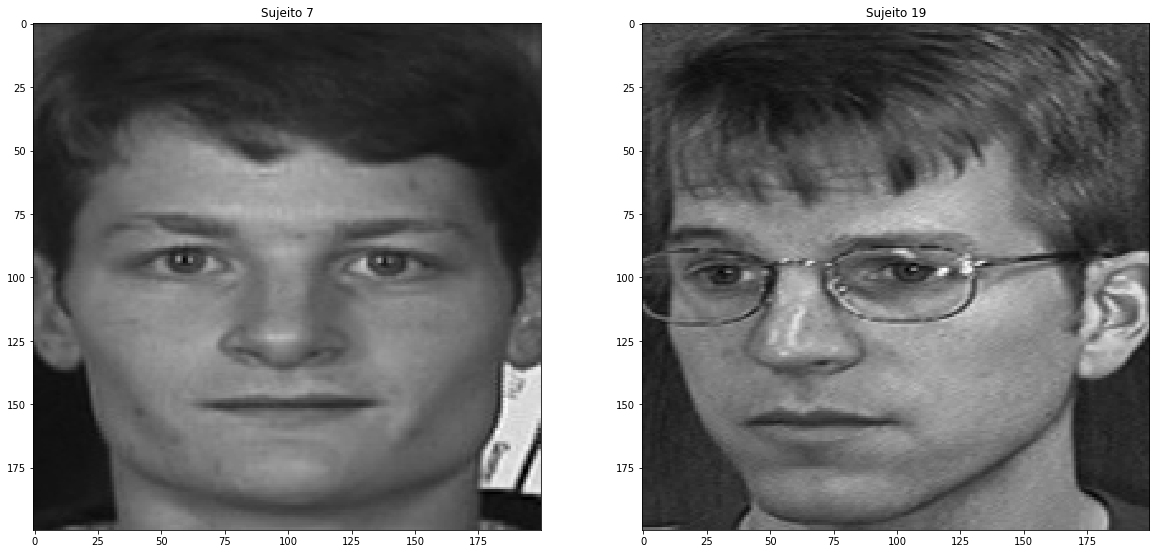

In [28]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[6]))
plt.imshow(dados_teste[6], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[7]))
plt.imshow(dados_teste[7], cmap="gray")

plt.show()

In [29]:
predicao = modelo_eingenfaces.predict(dados_teste[6])
predicao

(7, 4050.9625535192463)

In [30]:
predicao = modelo_eingenfaces.predict(dados_teste[7])
predicao

(19, 3543.7683622682625)

In [31]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [32]:
modelo_fisherfaces.train(dados_treinamento, sujeitos)

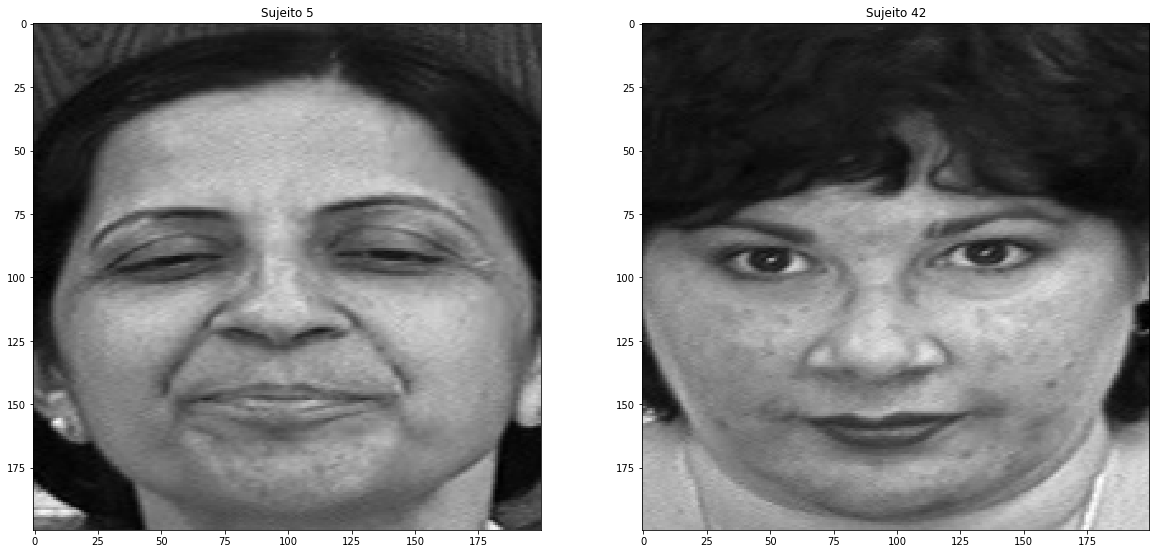

In [33]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[13]))
plt.imshow(dados_teste[13], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[19]))
plt.imshow(dados_teste[19], cmap="gray")

plt.show()

In [34]:
predicao = modelo_fisherfaces.predict(dados_teste[13])
predicao

(5, 1155.3047935819307)

In [35]:
predicao = modelo_fisherfaces.predict(dados_teste[19])
predicao

(42, 1127.0511133373568)

In [36]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [37]:
modelo_lbph.train(dados_treinamento, sujeitos)

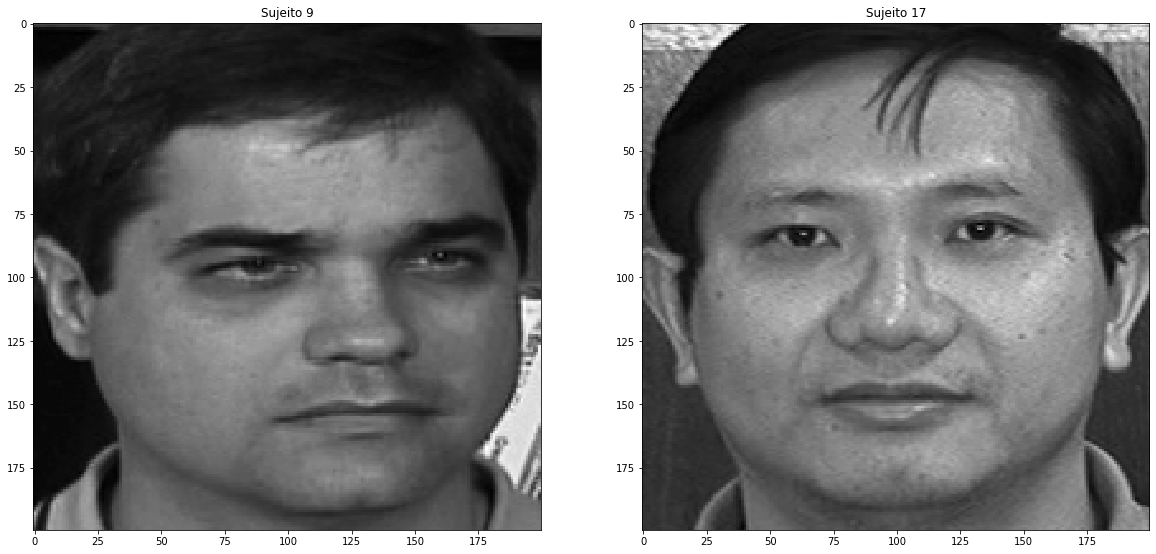

In [38]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[21]))
plt.imshow(dados_teste[21], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[27]))
plt.imshow(dados_teste[27], cmap="gray")

plt.show()

In [39]:
predicao = modelo_lbph.predict(dados_teste[21])
predicao

(9, 38.72438311678069)

In [40]:
predicao = modelo_lbph.predict(dados_teste[27])
predicao

(17, 37.604270261531475)

In [47]:
y_pred_eingenfaces = []

In [48]:
for item in dados_teste:
    y_pred_eingenfaces.append(modelo_eingenfaces.predict(item)[0])

In [49]:
acuracia_eingenfaces = accuracy_score(sujeitos_teste, y_pred_eingenfaces)

In [50]:
acuracia_eingenfaces

0.724

In [51]:
y_pred_fisherfaces = []

In [53]:
for item in dados_teste:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])

In [54]:
acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)

In [55]:
acuracia_fisherfaces

0.52

In [56]:
y_pred_lbph = []

In [57]:
for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])

In [58]:
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)

In [59]:
acuracia_lbph

0.792